### Load speeches

In [5]:
import pandas as pd
speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')

In [196]:
speeches_df.head(1)

,TipoPronunciamento,Data,SiglaCasa,TipoSessao,NomeAutor,CodigoParlamentar,Partido,UF,SexoParlamentar,DataNascimentoParlamentar,Indexacao,TextoIntegral
CodigoPronunciamento,,,,,,,,,,,,
445800,Pronunciamento,2018-05-28,SF,NDL,Alvaro Dias,945,PODE,PR,Masculino,1944-12-07,"CRITICA, ATUAÇÃO, MICHEL TEMER, PRESIDENTE DA ...",O SR. ALVARO DIAS (Bloco Parlamentar Dem...


### Show statistics

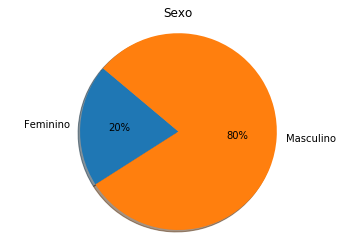

In [195]:
s = speeches_df.groupby(['SexoParlamentar']).size()
s = tuple(zip(s,s.index))
plt.title('Sexo')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [32]:
import matplotlib.pyplot as plt
import numpy as np

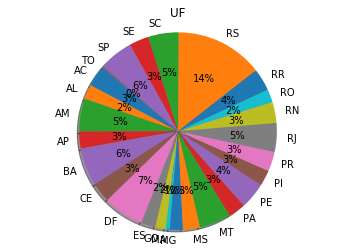

In [65]:
s = speeches_df.groupby(['UF']).size()
s = tuple(zip(s,s.index))
plt.title('UF')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

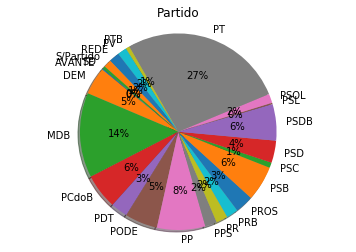

In [66]:
s = speeches_df.groupby(['Partido']).size()
s = tuple(zip(s,s.index))
plt.title('Partido')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

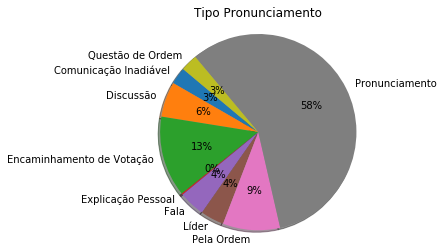

In [67]:
s = speeches_df.groupby(['TipoPronunciamento']).size()
s = tuple(zip(s,s.index))
plt.title('Tipo Pronunciamento')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

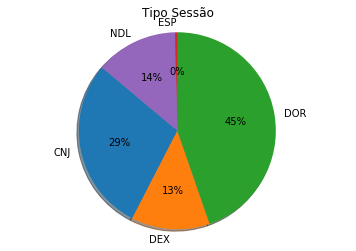

In [68]:
s = speeches_df.groupby(['TipoSessao']).size()
s = tuple(zip(s,s.index))
plt.title('Tipo Sessão')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Explore speech contents

In [177]:
import modules.nlputils as nlputils
from wordcloud import WordCloud

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])

def plot_wordcloud(document_contents):
    words = []
    for t in document_contents:
        for a in t:
            words.append(a)
    text = ''
    text = ' '.join(list(words))
    wordcloud = WordCloud(max_font_size=40, random_state=42).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

All speeches 06/2018
qtty=466


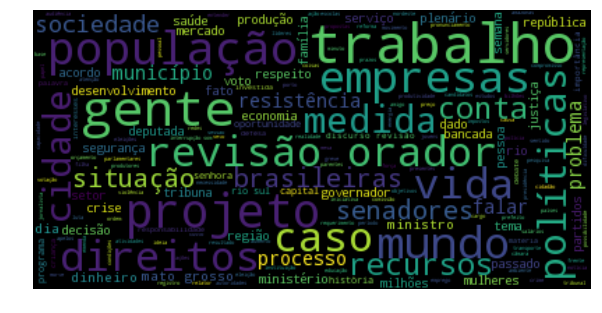

In [192]:
speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]
tokens = nlputils.tokenize_filter_stem(speeches, stopwords, min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)

print('All speeches 06/2018')
print('qtty=' + str(len(speeches)))
plot_wordcloud(tokens)

All speeches 07/2018
qtty=369


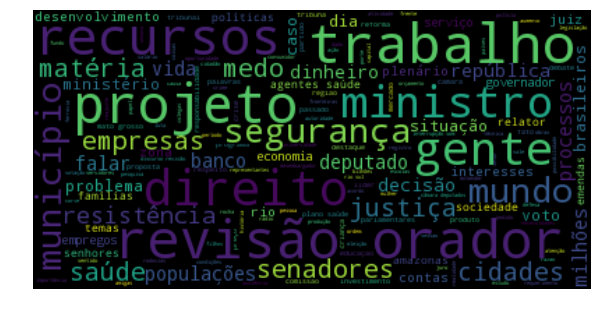

In [193]:
speeches_df = pd.read_csv('output/speeches/senate-speeches-201807.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]
tokens = nlputils.tokenize_filter_stem(speeches, stopwords, min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)

print('All speeches 07/2018')
print('qtty=' + str(len(speeches)))
plot_wordcloud(tokens)

### Topics clustering

In [182]:
import gensim
from gensim import corpora, models

dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=100)
print(lda_model)

LdaModel(num_terms=2253, num_topics=4, decay=0.5, chunksize=2000)


In [183]:
lda_model.print_topics(4)

[(0,
  '0.034*"deputados" + 0.026*"revisão" + 0.022*"orador" + 0.020*"recursos" + 0.015*"servidores" + 0.015*"destaque" + 0.012*"matéria" + 0.012*"banco" + 0.012*"rodovias" + 0.011*"líder"'),
 (1,
  '0.018*"decisão" + 0.018*"ministro" + 0.016*"direito" + 0.014*"processos" + 0.014*"juiz" + 0.014*"tribunal" + 0.013*"desembargador" + 0.012*"justiça" + 0.009*"políticas" + 0.009*"república"'),
 (2,
  '0.025*"saúde" + 0.016*"agentes" + 0.015*"resistência" + 0.015*"cidades" + 0.013*"trabalho" + 0.012*"rio" + 0.011*"famílias" + 0.009*"segurança" + 0.009*"governador" + 0.009*"município"'),
 (3,
  '0.019*"projeto" + 0.017*"saúde" + 0.014*"empresas" + 0.013*"trabalho" + 0.012*"senadores" + 0.010*"empregos" + 0.010*"plano" + 0.008*"revisão" + 0.008*"resistência" + 0.008*"banco"')]